<a href="https://colab.research.google.com/github/WatsonWBlair/CNN_Workshop/blob/main/Tensorflow_CNN_Tutiorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models,Input
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


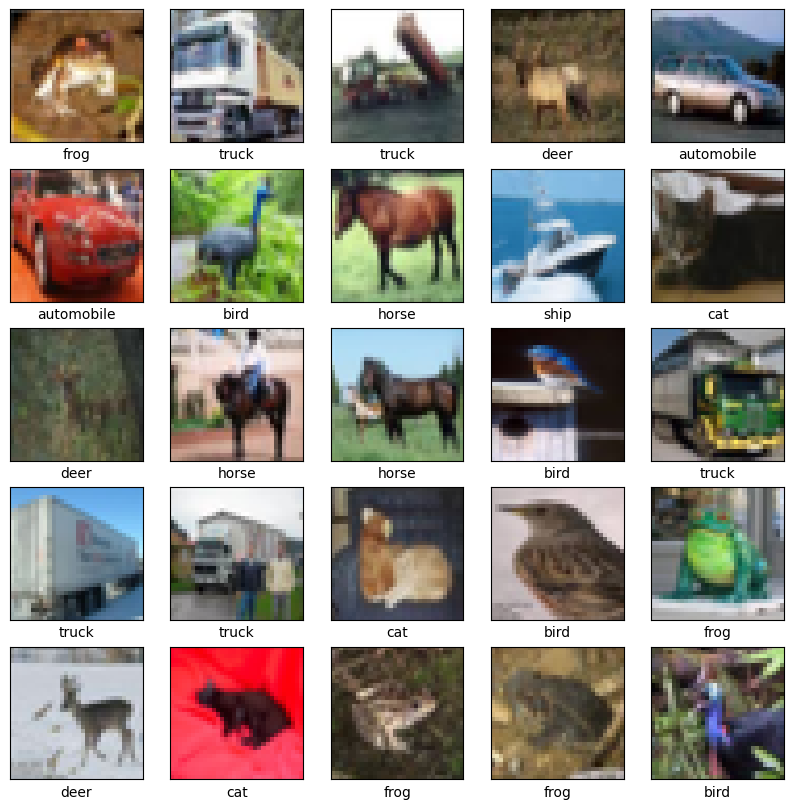

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Image Visualization from Conv Layers
## (** only to make conv layers output concept clear**)

In [4]:

# Define the model
inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2), name='pool1')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2), name='pool2')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv3')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(64, activation='relu', name='dense1')(x)
outputs = layers.Dense(10, name='output')(x)

model = Model(inputs, outputs)

# Model to fetch all layer outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Load and preprocess image
def load_and_prepare_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Visualize activations
def visualize_activations(img_array):
    activations = activation_model.predict(img_array)

    plt.figure(figsize=(2, 2))
    plt.imshow(img_array[0])
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    for i, (layer, activation) in enumerate(zip(model.layers, activations)):
        print(f"\nLayer {i+1}: {layer.name}")
        print("Shape:", activation.shape)

        if len(activation.shape) == 4:
            n_features = activation.shape[-1]
            size = activation.shape[1]
            n_cols = min(n_features, 6)
            display_grid = np.zeros((size, n_cols * size))
            for j in range(n_cols):
                feature_map = activation[0, :, :, j]
                feature_map -= feature_map.mean()
                feature_map /= (feature_map.std() + 1e-5)
                feature_map *= 64
                feature_map += 128
                feature_map = np.clip(feature_map, 0, 255).astype('uint8')
                display_grid[:, j * size : (j + 1) * size] = feature_map
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
            plt.title(f'Feature maps: {layer.name}')
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.axis('off')
            plt.show()

        elif len(activation.shape) == 2:
            plt.figure(figsize=(10, 1))
            plt.title(f'Layer {layer.name} (1D output)')
            plt.imshow(activation, aspect='auto', cmap='inferno')
            plt.colorbar()
            plt.axis('off')
            plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


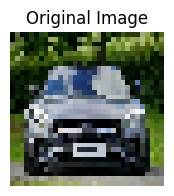


Layer 1: input_layer
Shape: (1, 32, 32, 3)


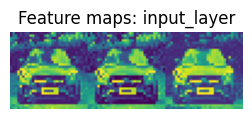


Layer 2: conv1
Shape: (1, 30, 30, 32)


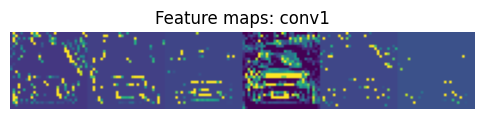


Layer 3: pool1
Shape: (1, 15, 15, 32)


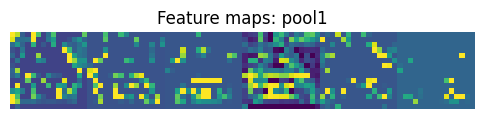


Layer 4: conv2
Shape: (1, 13, 13, 64)


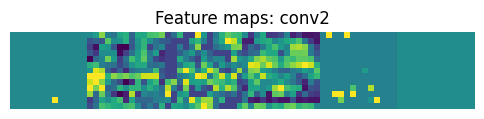


Layer 5: pool2
Shape: (1, 6, 6, 64)


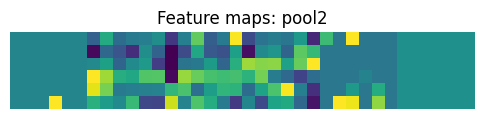


Layer 6: conv3
Shape: (1, 4, 4, 64)


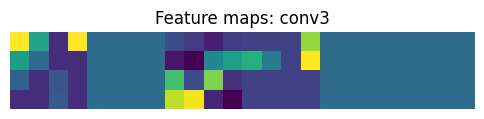


Layer 7: flatten
Shape: (1, 1024)


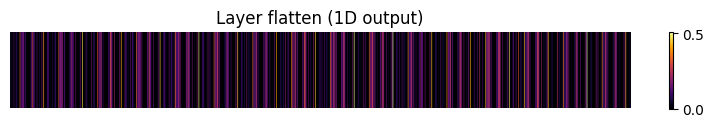


Layer 8: dense1
Shape: (1, 64)


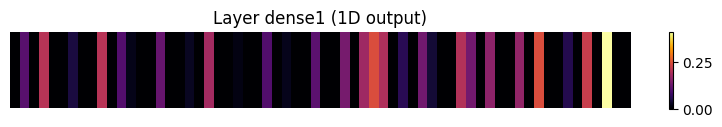


Layer 9: output
Shape: (1, 10)


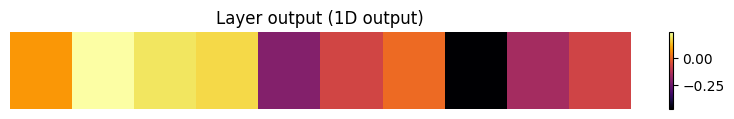

In [5]:
# Example usage
image_path = "/content/image.jpg"  # Replace this with your image path
if os.path.exists(image_path):
    img_array = load_and_prepare_image(image_path)
    visualize_activations(img_array)
else:
    print("Image not found. Please check the path.")

## Model For the Loaded dataset (According To CIFAR)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


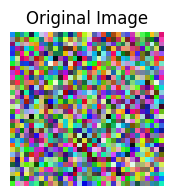


Layer 1: input_layer_1
Shape: (1, 32, 32, 3)


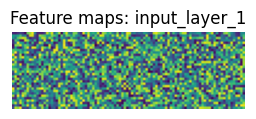


Layer 2: conv1
Shape: (1, 30, 30, 32)


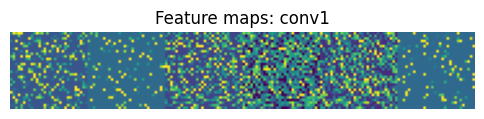


Layer 3: pool1
Shape: (1, 15, 15, 32)


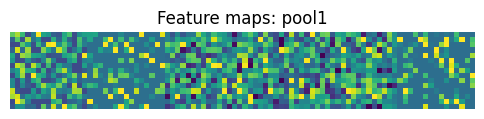


Layer 4: conv2
Shape: (1, 13, 13, 64)


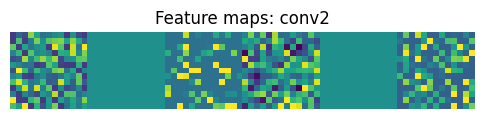


Layer 5: pool2
Shape: (1, 6, 6, 64)


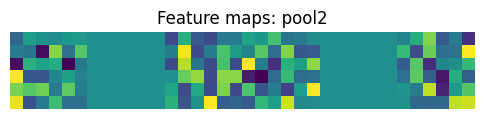


Layer 6: conv3
Shape: (1, 4, 4, 64)


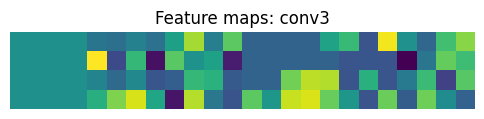


Layer 7: flatten
Shape: (1, 1024)


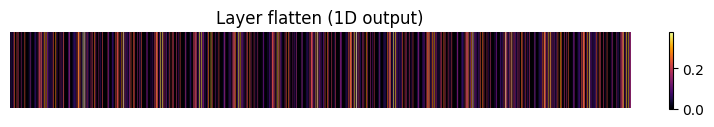


Layer 8: dense1
Shape: (1, 64)


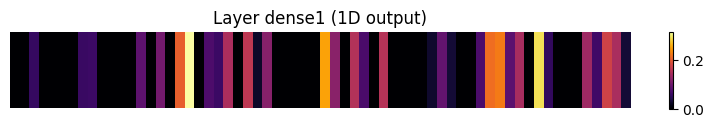


Layer 9: output
Shape: (1, 10)


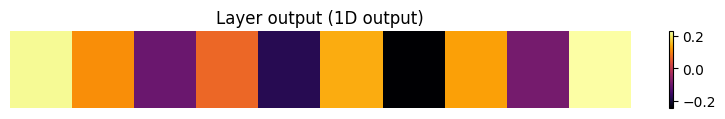

In [6]:


# Define model using Functional API
inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2), name='pool1')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2), name='pool2')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name='conv3')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(64, activation='relu', name='dense1')(x)
outputs = layers.Dense(10, name='output')(x)

model = Model(inputs, outputs)

# Model to get all layer outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Dummy input image
input_image = np.random.random((1, 32, 32, 3))
activations = activation_model.predict(input_image)

# Plot the original image
plt.figure(figsize=(2, 2))
plt.imshow(input_image[0])
plt.title("Original Image")
plt.axis('off')
plt.show()

# Process and display outputs of all layers
for i, (layer, activation) in enumerate(zip(model.layers, activations)):
    print(f"\nLayer {i+1}: {layer.name}")
    print("Shape:", activation.shape)

    # Visualize feature maps for 2D data (conv/pool)
    if len(activation.shape) == 4:
        n_features = activation.shape[-1]
        size = activation.shape[1]
        n_cols = min(n_features, 6)
        display_grid = np.zeros((size, n_cols * size))
        for j in range(n_cols):
            feature_map = activation[0, :, :, j]
            feature_map -= feature_map.mean()
            feature_map /= (feature_map.std() + 1e-5)
            feature_map *= 64
            feature_map += 128
            feature_map = np.clip(feature_map, 0, 255).astype('uint8')
            display_grid[:, j * size : (j + 1) * size] = feature_map
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(f'Feature maps: {layer.name}')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.axis('off')
        plt.show()

    # Plot 1D Dense/Flatten outputs as a heatmap
    elif len(activation.shape) == 2:
        plt.figure(figsize=(10, 1))
        plt.title(f'Layer {layer.name} (1D output)')
        plt.imshow(activation, aspect='auto', cmap='inferno')
        plt.colorbar()
        plt.axis('off')
        plt.show()


## Model Summary

In [7]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3614 - loss: 1.7252 - val_accuracy: 0.5580 - val_loss: 1.2502
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 53ms/step - accuracy: 0.5905 - loss: 1.1557 - val_accuracy: 0.6424 - val_loss: 1.0223
Epoch 3/10


## Save Model

In [ ]:
# Save the entire model to a .h5 file
model.save("/content/cnn_model.h5")


## Evaluate Model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

##Confusion Matrix

In [ ]:
# Load the saved model
model = tf.keras.models.load_model("cnn_model.h5")

# Predict on the test set
logits = model.predict(test_images)
predicted_labels = np.argmax(logits, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()